# CS4035 - Cyber Data Analytics
## Lab 1 - Fraud data

### Submit on brightspace (zip file with the name Group_xx.zip)
(i) This jupyter file completed with code, plots, figures and report for each question. Additional plots and figures can be created for explanation before the end of each main question. Lab 1 contains 5 main questions, including the bonus. Write the code or explanation below each sub question. For the explanations, include what you would normally include in the report for this lab assignment, for example data pre-processing, hypothesis tested, approach, results, etc.
(ii) The libraries needed to run this file. Except for numpy, scikit-learn, pandas, matplotlib

Your peers should be able to use the readme section for instructions and be able to run this file. 

Make sure to keep your answers concise. Maximum number of words is 1000, which you can count with the code below. (You can add around 600 words since we start at around 400).

In [87]:
!python -m pip install --upgrade pip
!pip install --upgrade nbformat
!pip install --upgrade IPython

In [88]:
!python --version
!ls

Python 3.9.13


'ls' is not recognized as an internal or external command,
operable program or batch file.


In [89]:
# If this cell does not work try running `pip install nbformat`

import io
import nbformat
import re
nb = nbformat.read("Lab1-2021.ipynb", nbformat.NO_CONVERT)
word_count = 0
for cell in nb.cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))

print("Word count:", word_count)

Word count: 368


## Group Number :

## Student 1 
### Name :
### ID :

## Student 2
### Name :
### ID :

## Readme - Provide instructions - libraries used, location of the data file, etc. Keep it short. Remember your peers will not debug your code and should be able to reproduce the exact output you provide.

## 1. Visualization task – 1 A4

### 1a. Plot visulations 

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
df1 = pd.read_csv('data/train_data.csv')
# Change index to Id
df1.set_index('Id', inplace=True)
df1.head()

,issuercountrycode,txvariantcode,bin,amount,currencycode,shoppercountrycode,shopperinteraction,cardverificationcodesupplied,cvcresponsecode,accountcode,mail_id,ip_id,card_id,label
Id,,,,,,,,,,,,,,
1,GB,mccredit,546097.0,4500.0,GBP,GB,Ecommerce,True,1,UKAccount,email132571,ip123779,card250169,0
2,GB,mcdebit,557349.0,3395.0,GBP,GB,Ecommerce,True,1,UKAccount,email312302,ip298387,card14235,0
3,GB,mccredit,542011.0,3895.0,GBP,GB,Ecommerce,True,1,UKAccount,email255027,ip260053,card31944,0
4,GB,visadebit,465943.0,15345.0,GBP,GB,ContAuth,False,0,UKAccount,email283167,ip54851,card120871,0
6,GB,visadebit,475127.0,5095.0,GBP,GB,Ecommerce,True,1,UKAccount,email325263,ip203929,card208017,0


In [91]:
# Preprocessing steps, taken from the notebook provided on Brightspace

# 1.Card ID
card_enc = LabelEncoder()
card_enc.fit(df1['card_id'])
df1['card_id'] = card_enc.transform(df1.card_id)

# 2.IP ID
ip_enc = LabelEncoder()
ip_enc.fit(df1['ip_id'])
df1['ip_id'] = ip_enc.transform(df1.ip_id)

#Encoding, Cleaning the data
df1.loc[df1['cardverificationcodesupplied'].isna(),'cardverificationcodesupplied'] = False
df1.loc[df1['issuercountrycode'].isna(),'issuercountrycode'] = 'ZZ'
df1.loc[df1['shoppercountrycode'].isna(),'shoppercountrycode'] = 'ZZ'
#Explain the code above
#
unique_issuer_cc = df1['issuercountrycode'].unique()
unique_shopper_cc = df1['shoppercountrycode'].unique()
both = np.append(unique_issuer_cc, unique_shopper_cc)
df_countrycodes = pd.DataFrame(both)
unique_codes = df_countrycodes[0].unique()
enc = LabelEncoder()
enc.fit(unique_codes)
df1['issuercountrycode'] = enc.transform(df1.issuercountrycode)
df1['shoppercountrycode'] = enc.transform(df1.shoppercountrycode)
def conv(row):
    currency_dict = {"BGN": 1.9558, "NZD": 1.6805, "ILS": 4.0448, "RUB": 72.2099, "CAD": 1.5075, "USD": 1.1218,
                     "PHP": 58.125, "CHF": 1.1437, "ZAR": 16.0224, "AUD": 1.5911, "JPY": 124.93, "TRY": 6.6913,
                     "HKD": 8.8007, "MYR": 4.6314, "THB": 35.802, "HRK": 7.413, "NOK": 9.6678, "IDR": 15953.68,
                     "DKK": 7.4646, "CZK": 25.659, "HUF": 322.97, "GBP": 0.86248, "MXN": 21.2829, "KRW": 1308.01,
                     "ISK": 136.2, "SGD": 1.5263, "BRL": 4.405, "PLN": 4.2868, "INR": 78.0615, "RON": 4.7596,
                     "CNY": 7.5541, "SEK": 10.635}
    return row['amount'] / (currency_dict[row['currencycode']])

# apply conv to df1

df1['amount_eur'] = df1.apply(lambda x: conv(x), axis=1)


enc1 = LabelEncoder()
enc1.fit(df1['txvariantcode'])
df1['txvariantcode'] = enc1.transform(df1.txvariantcode)

enc2 = LabelEncoder()
enc2.fit(df1['currencycode'])
df1['currencycode'] = enc2.transform(df1.currencycode)

enc3 = LabelEncoder()
enc3.fit(df1['shopperinteraction'])
df1['shopperinteraction'] = enc3.transform(df1.shopperinteraction)

df1['accountcode'] = df1['accountcode'].apply(lambda x: re.sub('Account','',x))
df1['accountcode_cc'] = 0
df1.loc[(df1['accountcode'] == 'UK'),'accountcode_cc'] = 'GB'
df1.loc[(df1['accountcode'] == 'Mexico'),'accountcode_cc'] = 'MX'
df1.loc[(df1['accountcode'] == 'Sweden'),'accountcode_cc'] = 'SE'
df1.loc[(df1['accountcode'] == 'APAC'),'accountcode_cc'] = 'APAC'

enc4 = LabelEncoder()
enc4.fit(df1['accountcode'])
df1['accountcode'] = enc4.transform(df1.accountcode)

enc5 = LabelEncoder()
enc5.fit(df1['cardverificationcodesupplied'])
df1['cardverificationcodesupplied'] = enc5.transform(df1.cardverificationcodesupplied)

df1.loc[df1['mail_id'].str.contains('na',case=False),'mail_id'] = 'email99999'

enc6 = LabelEncoder()
enc6.fit(df1['mail_id'])
df1['mail_id'] = enc6.transform(df1.mail_id)

df1.loc[df1['cvcresponsecode'] > 2,'cvcresponsecode'] = 3

#Feature Engineering
df1['countries_equal'] = (df1['shoppercountrycode'] == df1['issuercountrycode'])
df1.loc[df1['countries_equal'] == False,'countries_equal'] = 0
df1.loc[df1['countries_equal'] == True,'countries_equal'] = 1
df1.head()

,issuercountrycode,txvariantcode,bin,amount,currencycode,shoppercountrycode,shopperinteraction,cardverificationcodesupplied,cvcresponsecode,accountcode,mail_id,ip_id,card_id,label,amount_eur,accountcode_cc,countries_equal
Id,,,,,,,,,,,,,,,,,
1,49,2,546097.0,4500.0,1,49,1,1,1,3,17805,12538,105460,0,5217.512290,GB,1
2,49,3,557349.0,3395.0,1,49,1,1,1,3,115620,107432,29882,0,3936.323161,GB,1
3,49,2,542011.0,3895.0,1,49,1,1,1,3,84651,87293,123743,0,4516.046749,GB,1
4,49,8,465943.0,15345.0,1,49,0,0,0,3,99845,147089,14712,0,17791.716909,GB,1
6,49,8,475127.0,5095.0,1,49,1,1,1,3,122624,56390,75841,0,5907.383360,GB,1


C:\Users\micha\AppData\Local\Temp\ipykernel_228\2983541602.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  sns.heatmap(df1.query('label==1').drop('label',1).corr(), vmax = .8, square=True, ax = ax1, cmap = 'YlGnBu')
C:\Users\micha\AppData\Local\Temp\ipykernel_228\2983541602.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  sns.heatmap(df1.query('label==0').drop('label',1).corr(), vmax = .8, square=True, ax = ax2, cmap = 'YlGnBu');


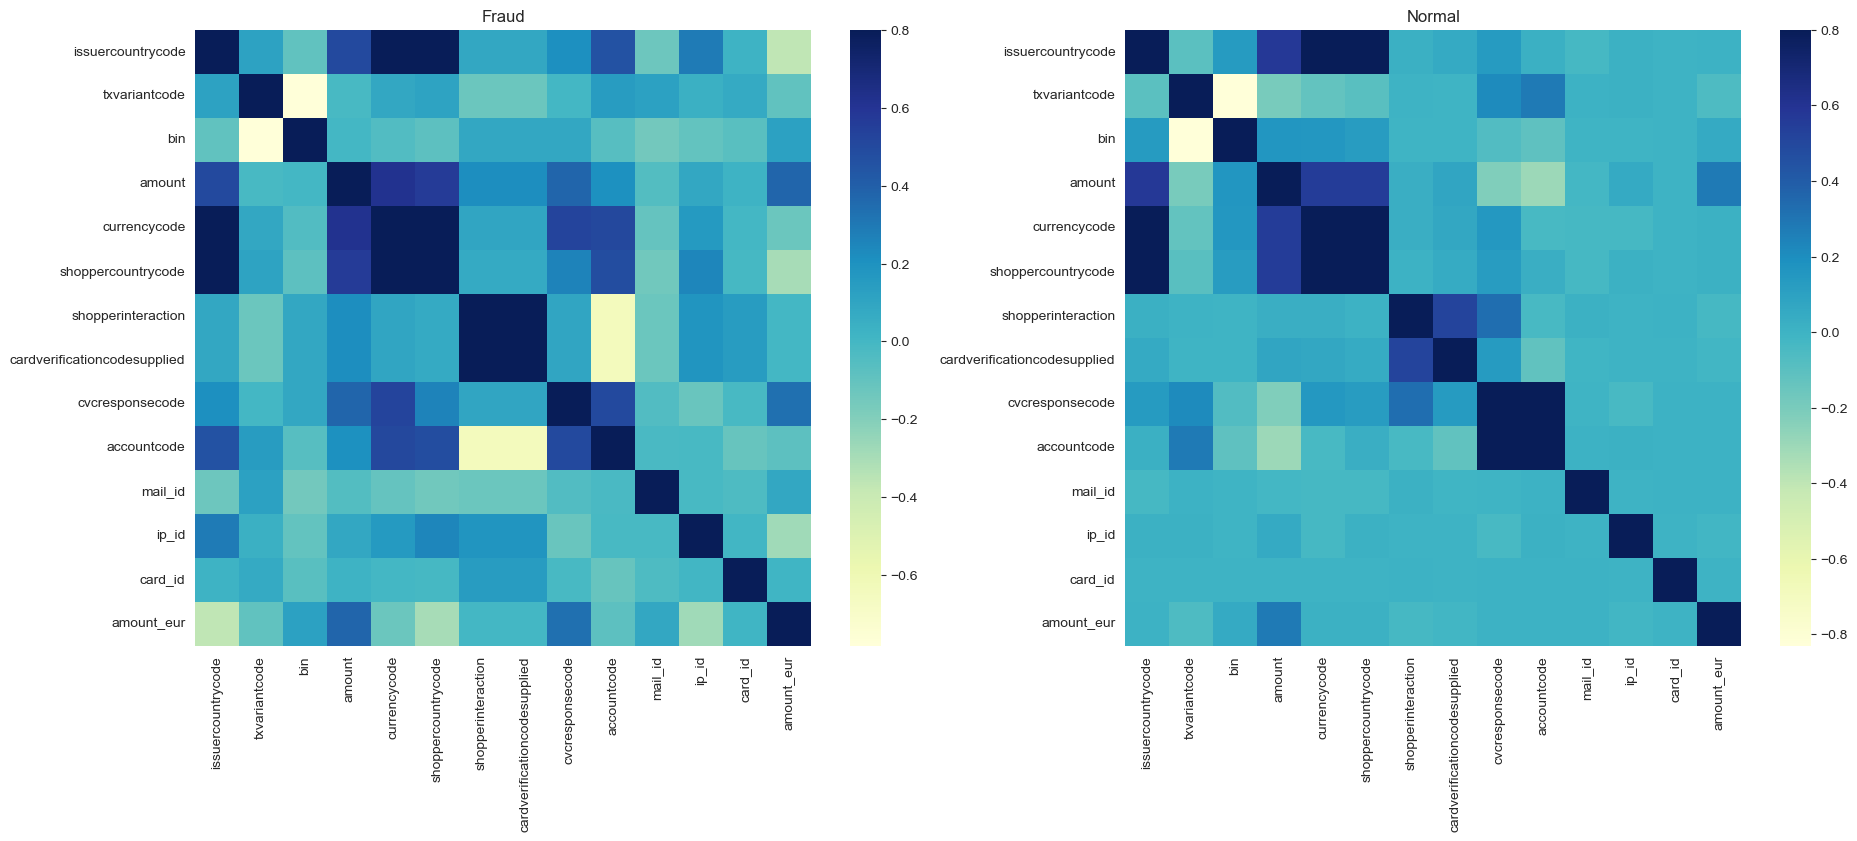

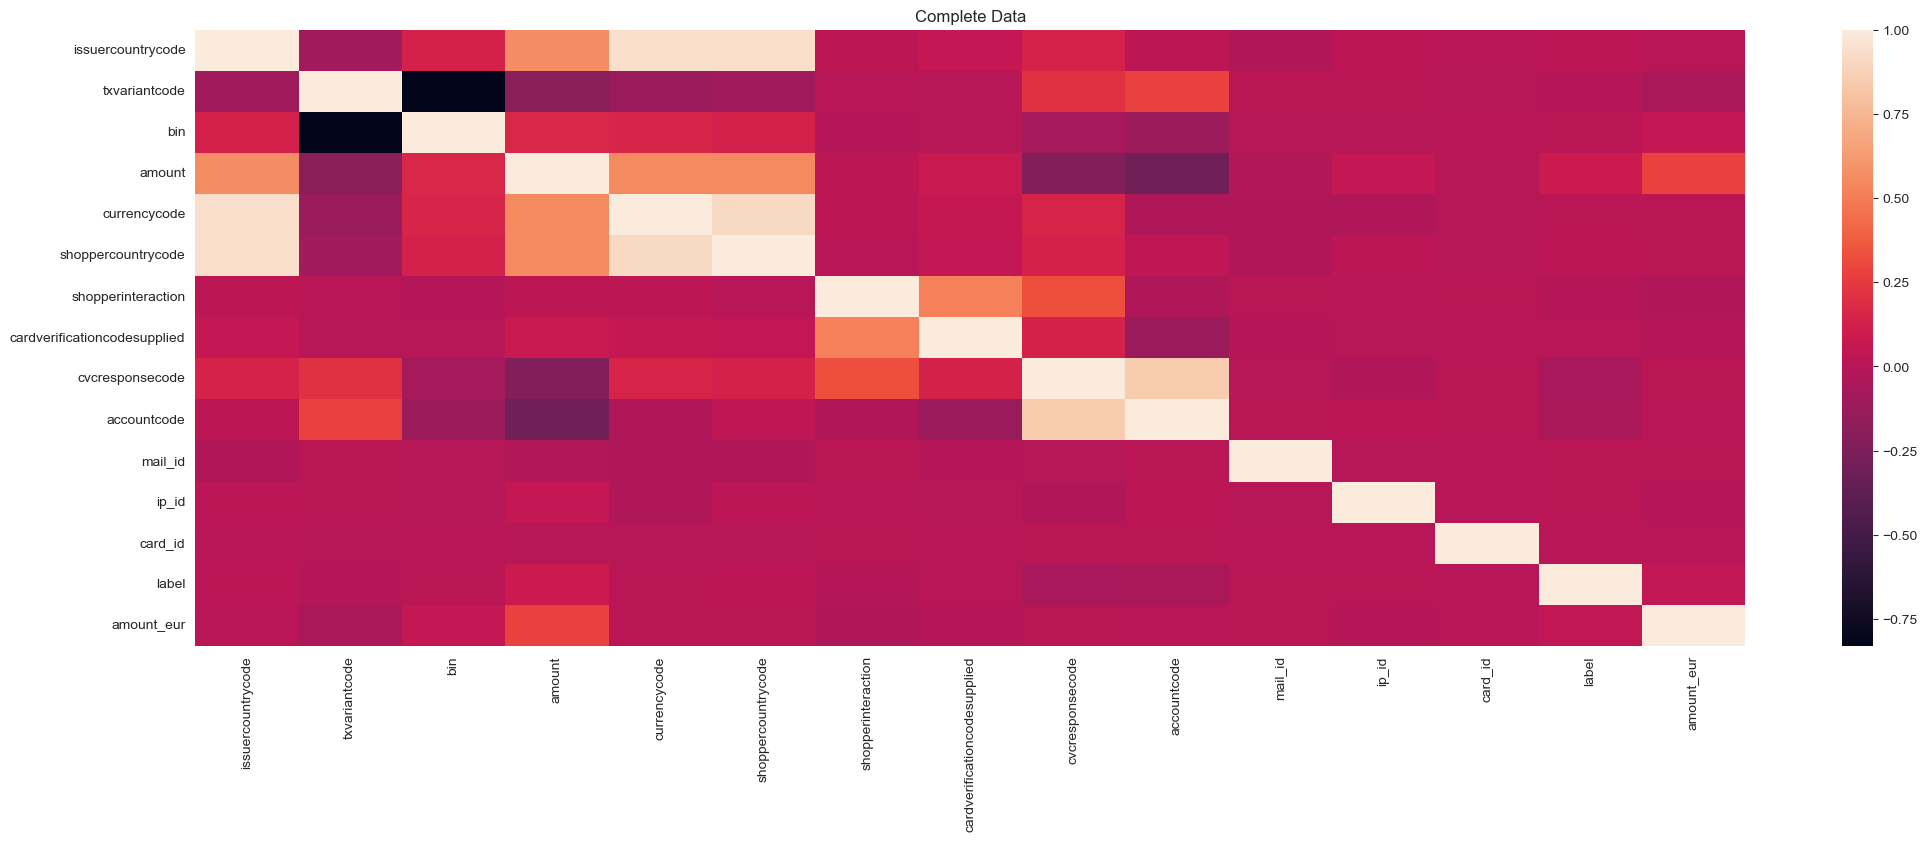

In [92]:
# Generating heatmaps for the correlation matrices using the code from Brightspace

#correlation matrices
f, (ax1, ax2) = plt.subplots(1,2,figsize =(22, 8))

sns.heatmap(df1.query('label==1').drop('label',1).corr(), vmax = .8, square=True, ax = ax1, cmap = 'YlGnBu')
ax1.set_title('Fraud')

sns.heatmap(df1.query('label==0').drop('label',1).corr(), vmax = .8, square=True, ax = ax2, cmap = 'YlGnBu');
ax2.set_title('Normal')

plt.show()

f, (ax1) = plt.subplots(1,figsize =(25, 8))
sns.heatmap(df1.corr())
ax1.set_title('Complete Data')
plt.show()



<AxesSubplot:xlabel='currencycode_str', ylabel='shoppercountrycode_str'>

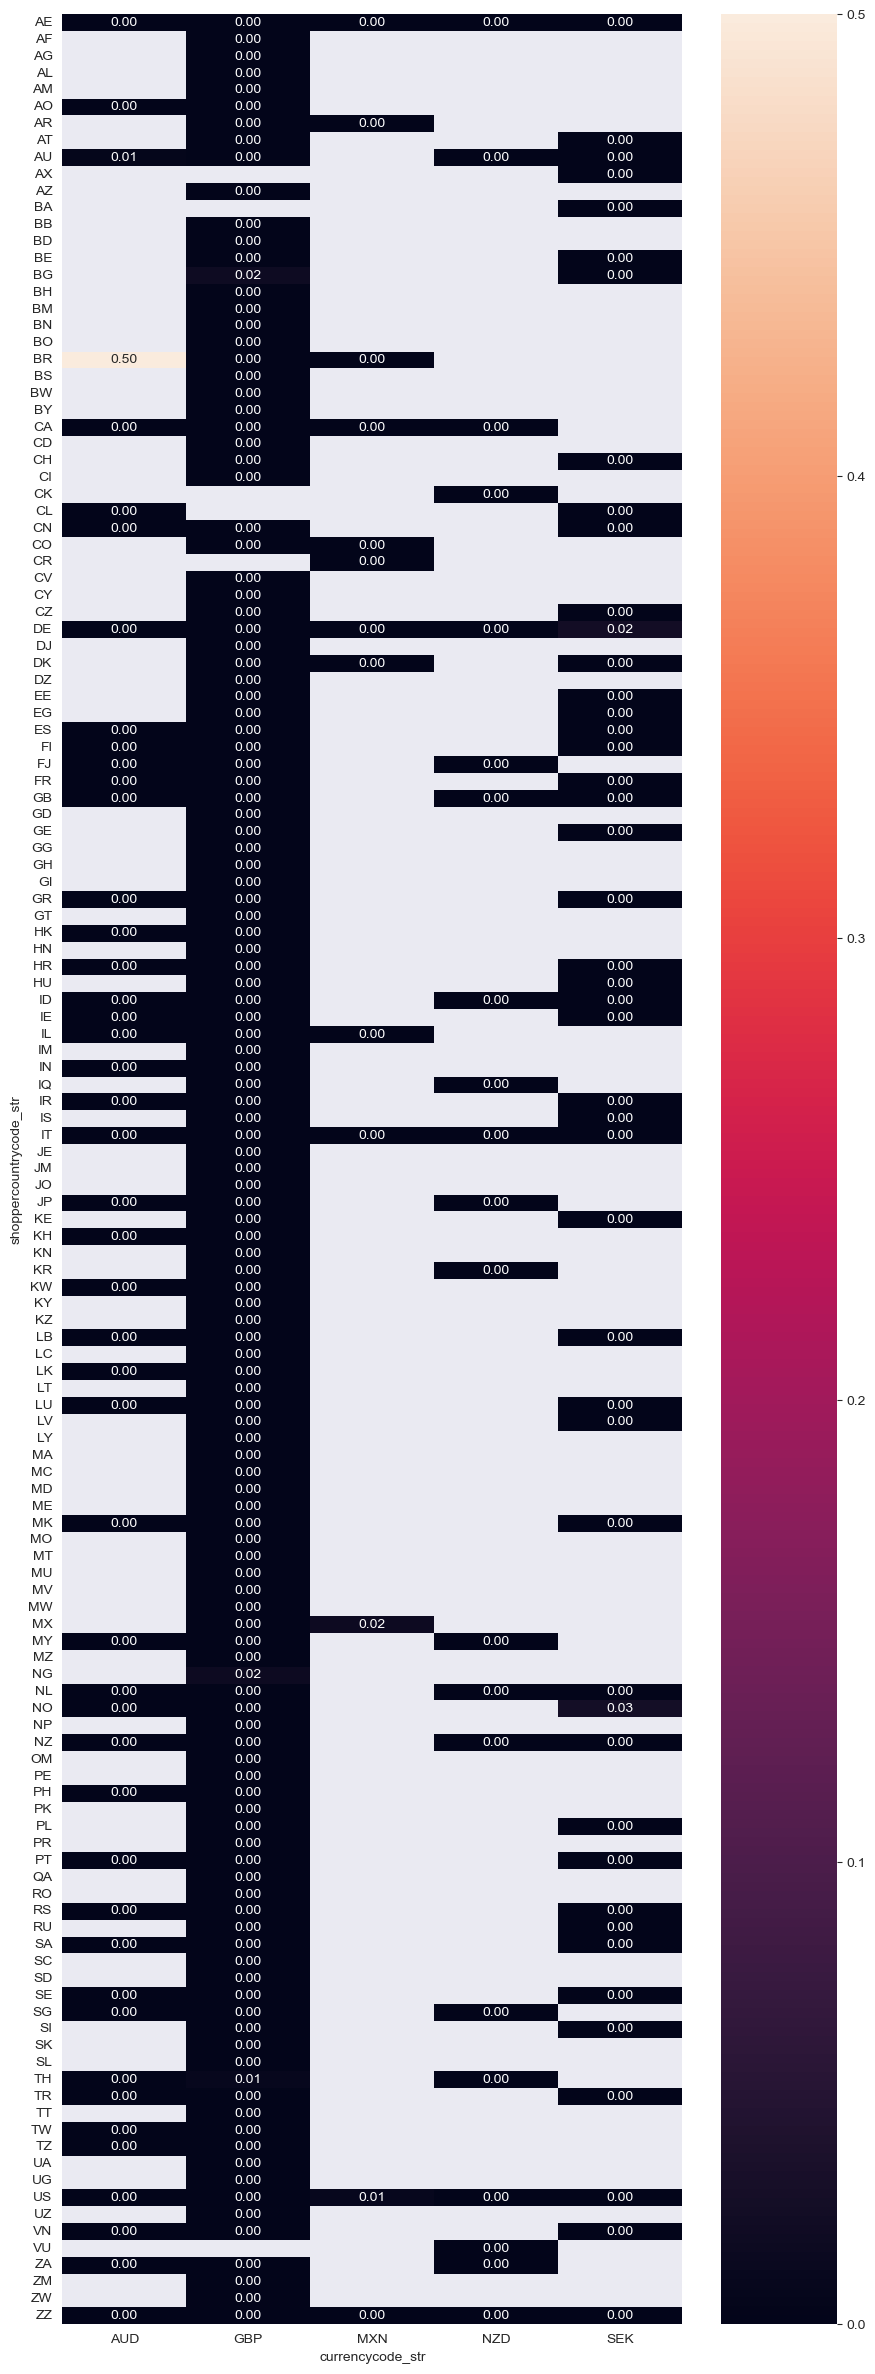

In [93]:
# Pivot the table to get the mean of the label for each currency type and shopper country code
df1['shoppercountrycode_str'] = enc.inverse_transform(df1['shoppercountrycode'])
df1['currencycode_str'] = enc2.inverse_transform(df1['currencycode'])
pivoted = df1.pivot_table(values='label', index='shoppercountrycode_str', columns='currencycode_str', aggfunc='mean')
# Make a seaborne heatmap that is long enough to leave room for the labels
plt.figure(figsize=(10, 30))
sns.heatmap(pivoted, annot=True, fmt=".2f")


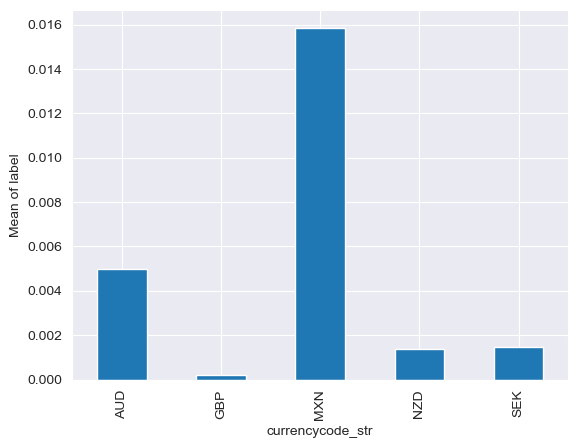

In [94]:
# Group by currency type and plot the mean of the label
df1.groupby('currencycode_str')['label'].mean().plot(kind='bar')
plt.ylabel('Mean of label')
plt.show()

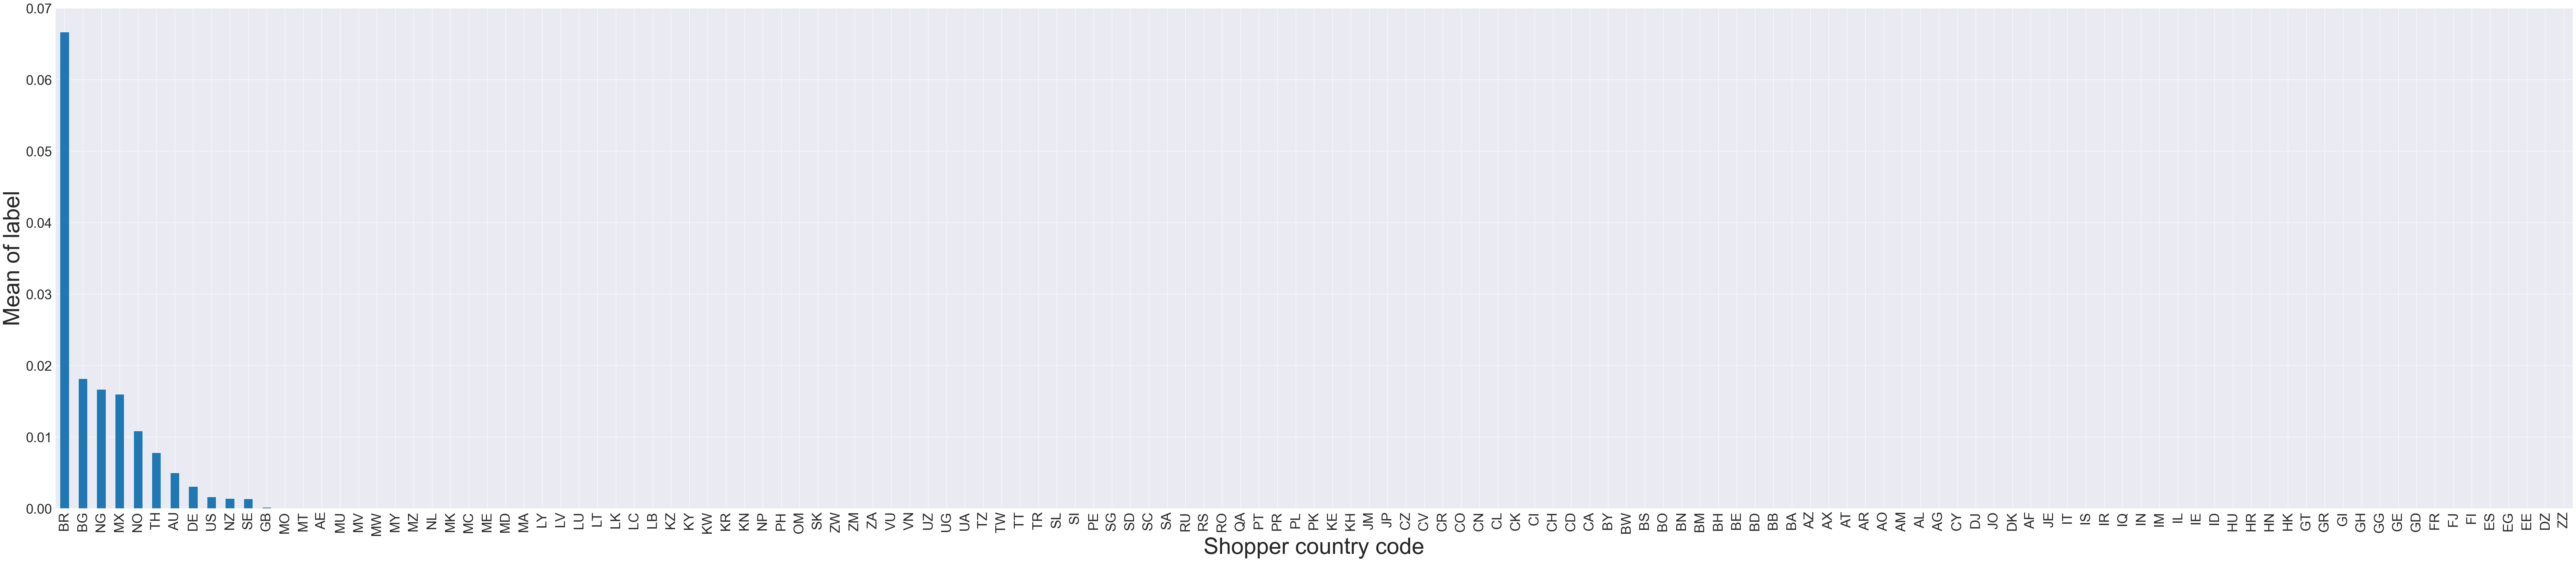

In [95]:
# Group by shopper country code and plot the mean of the label
plt.figure(figsize=(100, 20))
df1.groupby('shoppercountrycode_str')['label'].mean().sort_values(ascending=False).plot(kind='bar')
plt.ylabel('Mean of label', fontsize=50)
plt.xlabel('Shopper country code', fontsize=50)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.show()

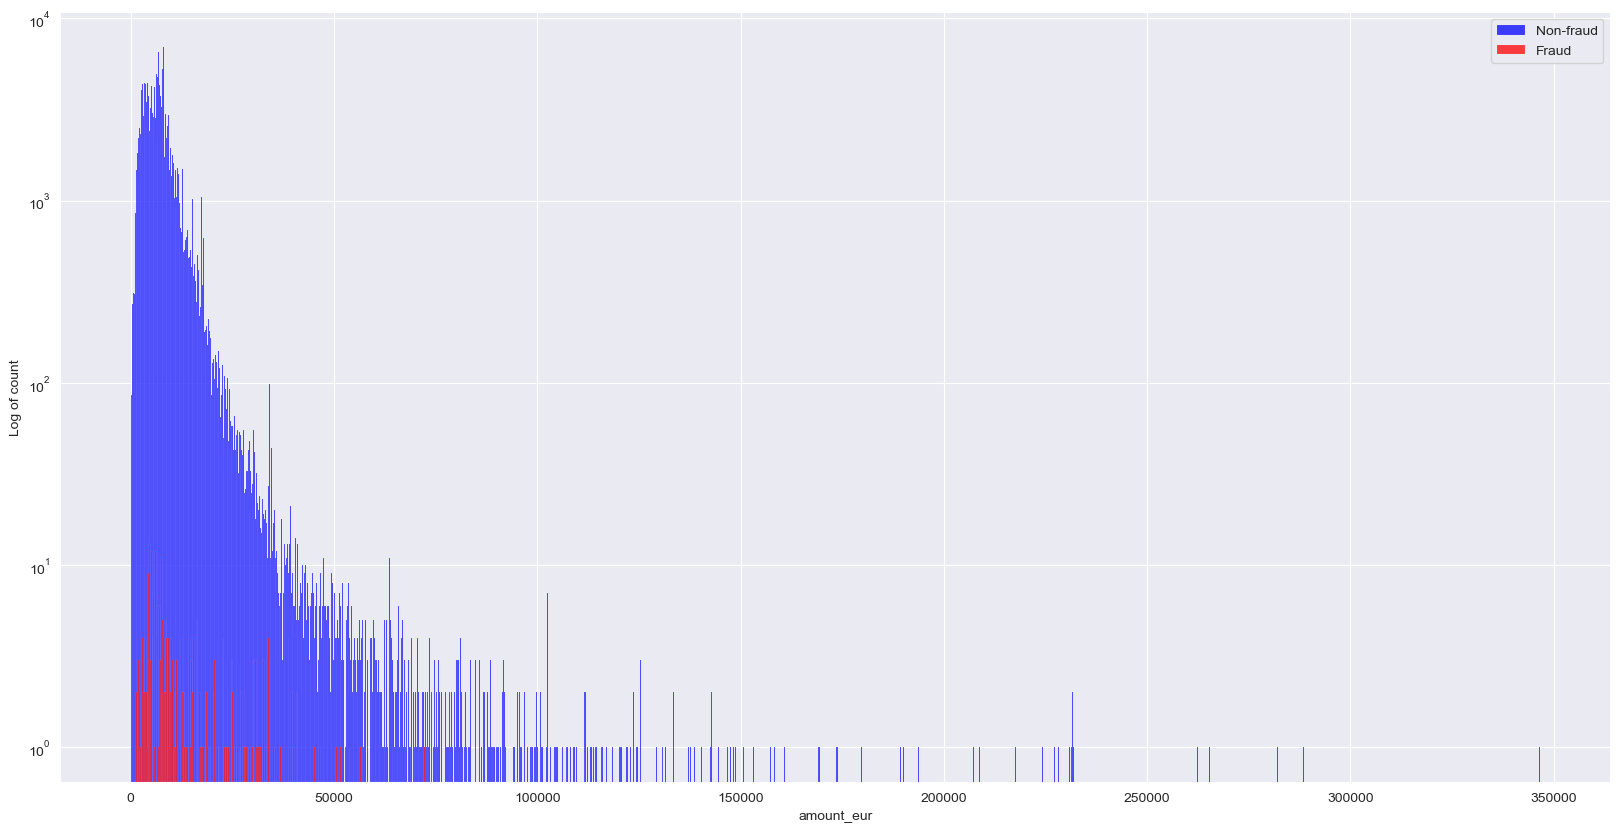

In [96]:
# Plot the distribution of the amount depending on the label
df_amount_fraud = df1[df1['label'] == 1]['amount_eur']
df_amount_non_fraud = df1[df1['label'] == 0]['amount_eur']
plt.figure(figsize=(20, 10))
sns.histplot(df_amount_non_fraud, color='blue', label='Non-fraud', log_scale=(False, True), binwidth=200)
sns.histplot(df_amount_fraud, color='red', label='Fraud', log_scale=(False, True), binwidth=200)
plt.ylabel("Log of count")
plt.legend()
plt.show()

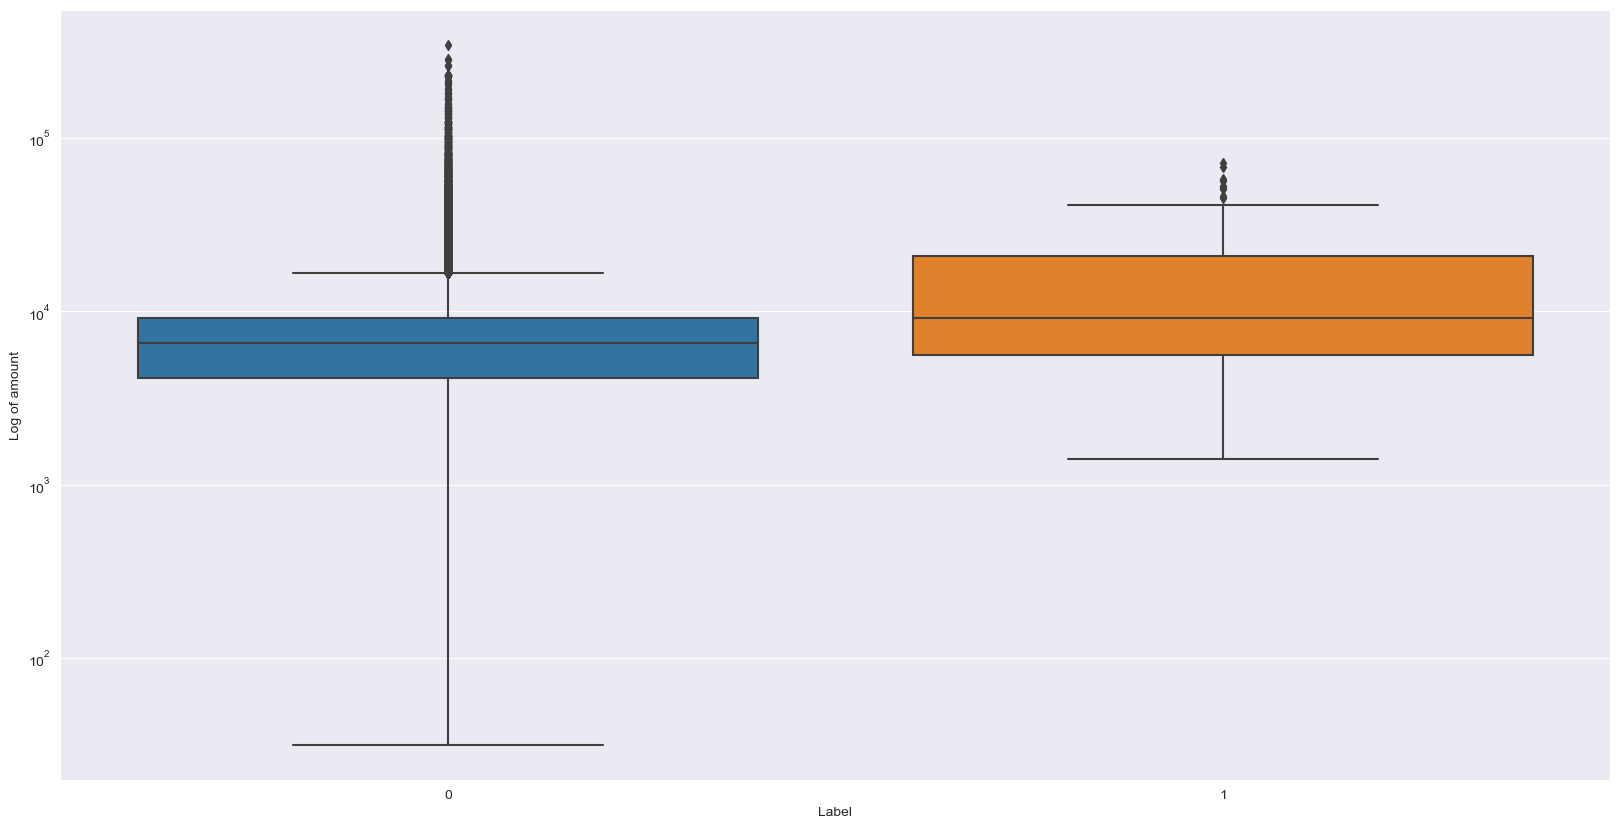

In [97]:
# Create a boxplot of the log of amount depending on the label
plt.figure(figsize=(20, 10))
sns.boxplot(x='label', y=df1['amount_eur'], data=df1)
plt.yscale('log')
plt.ylabel("Log of amount")
plt.xlabel("Label")
plt.show()

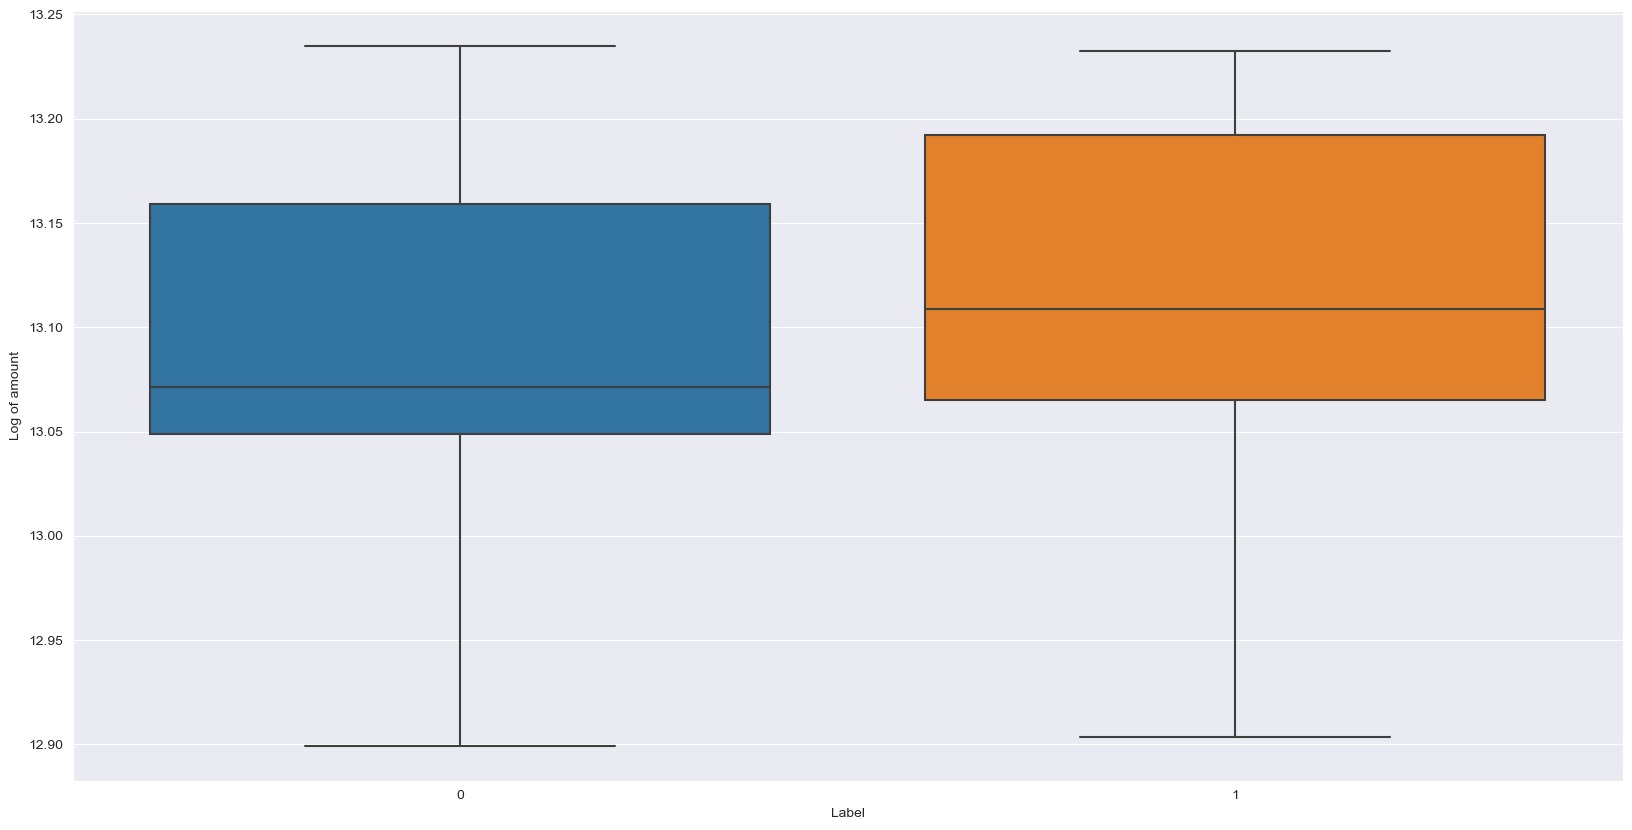

In [98]:
# Create a boxplot of the log of amount depending on the label
plt.figure(figsize=(20, 10))
sns.boxplot(x='label', y=np.log(df1['bin']), data=df1)
plt.ylabel("Log of amount")
plt.xlabel("Label")
plt.show()


### 1b. Describe the visualizations and provide relavant explanations of features and relations.

In [99]:
# How much can we preprocess data before visualizing it?
# Can we use ROC curves as a metric? AUC?
# How does the labeling work? Doesn't it give false results if the labels are arbitrary?
# Is the data normalized already?

## 2. Imbalance task – 1 A4 – Individual

AUC logistic regression:  0.7083630410097969
AUC random forest:  0.516025467296539
AUC decision tree:  0.5244277015917755
Accuracy logistic regression:  0.7499340821599958
Accuracy random forest:  0.9955175868797131
Accuracy decision tree:  0.9948056742076675
F1 logistic regression:  0.007949790794979079
F1 random forest:  0.02298850574712644
F1 decision tree:  0.029556650246305417
Confusion matrix logistic regression: 
 [[28404  9465]
 [   19    38]]
Confusion matrix random forest: 
 [[37754   115]
 [   55     2]]
Confusion matrix decision tree: 
 [[37726   143]
 [   54     3]]
Classification report logistic regression: 
               precision    recall  f1-score   support

           0       1.00      0.75      0.86     37869
           1       0.00      0.67      0.01        57

    accuracy                           0.75     37926
   macro avg       0.50      0.71      0.43     37926
weighted avg       1.00      0.75      0.86     37926

Classification report random forest: 
    

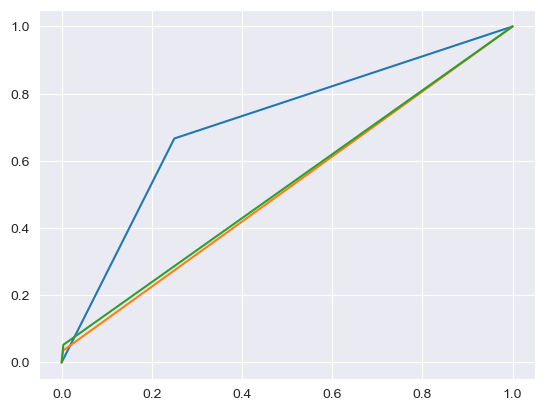

In [105]:
# Scaling the data
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# df1['amount_eur'] = scaler.fit_transform(df1[['amount_eur']])
# df1['bin'] = scaler.fit_transform(df1[['bin']])

# TODO: test the minmax scaler

# Splitting the data
from sklearn.model_selection import train_test_split
df1.head()
# X = df1.drop(['label', 'mail_id', 'ip_id', 'card_id', 'amount', 'accountcode_cc', 'shoppercountrycode_str', 'currencycode_str'], axis=1)
# Get only the relevant columns
X = df1[['amount_eur', 'bin', 'cvcresponsecode', 'shoppercountrycode', 'currencycode', 'countries_equal']]
y = df1['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train.head()

# Training the models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Logistic regression
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train)
logreg_pred = logreg.predict(X_test)

# Get the roc value
from sklearn.metrics import roc_auc_score
roc_value = roc_auc_score(y_test, logreg_pred)
print("AUC logistic regression: ", roc_value)
# Plot the roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, logreg_pred)
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % roc_value)

# Random forest
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Get the roc value
roc_value = roc_auc_score(y_test, rf_pred)
print("AUC random forest: ", roc_value)
# Plot the roc curve
fpr, tpr, thresholds = roc_curve(y_test, rf_pred)
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % roc_value)

# Decision tree
dt = DecisionTreeClassifier(class_weight='balanced')
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

# Get the roc value
roc_value = roc_auc_score(y_test, dt_pred)
print("AUC decision tree: ", roc_value)
# Plot the roc curve
fpr, tpr, thresholds = roc_curve(y_test, dt_pred)
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % roc_value)

# Print accuracies for each model
from sklearn.metrics import accuracy_score
print("Accuracy logistic regression: ", accuracy_score(y_test, logreg_pred))
print("Accuracy random forest: ", accuracy_score(y_test, rf_pred))
print("Accuracy decision tree: ", accuracy_score(y_test, dt_pred))

# Print f1 scores for each model
from sklearn.metrics import f1_score
print("F1 logistic regression: ", f1_score(y_test, logreg_pred))
print("F1 random forest: ", f1_score(y_test, rf_pred))
print("F1 decision tree: ", f1_score(y_test, dt_pred))

# Print confusion matrices for each model
from sklearn.metrics import confusion_matrix
print("Confusion matrix logistic regression: \n", confusion_matrix(y_test, logreg_pred))
print("Confusion matrix random forest: \n", confusion_matrix(y_test, rf_pred))
print("Confusion matrix decision tree: \n", confusion_matrix(y_test, dt_pred))

# Print classification reports for each model
from sklearn.metrics import classification_report
print("Classification report logistic regression: \n", classification_report(y_test, logreg_pred))
print("Classification report random forest: \n", classification_report(y_test, rf_pred))
print("Classification report decision tree: \n", classification_report(y_test, dt_pred))

# Print the feature importances for the random forest
print("Feature importances random forest: \n", rf.feature_importances_)

# Print the feature importances for the decision tree
print("Feature importances decision tree: \n", dt.feature_importances_)

# Print the feature importances for the logistic regression
print("Feature importances logistic regression: \n", logreg.coef_)

In [ ]:
from sklearn.model_selection import cross_validate
# Logistic regression
scorings = ['accuracy', 'f1', 'roc_auc']
scores = cross_validate(LogisticRegression(), X_train, y_train, scoring=scorings, cv=10)

### 2a. Print ROC curves

### 2b. Analyse the performance of the classifiers. Explain which method performs best.

### 2c. Is using SMOTE a good idea? Why (not)?

## 3. Privacy task – 1 A4 – Individual

### 3a. Print ROC curves

### 3b. Analyse the performance of the classifiers. Explain which method performs best.

### 3c. Can you explain the performance difference for the different classifiers? Is it advisable to protect people’s privacy using rank-swapping? Why (not)?

## 4. Classification task – 2 A4

### 4a. Print relevant plots and metrics with clear headings.

### 4b. Explain the applied data pre-processing steps, learning algorithms, and post-processing steps or ensemble methods. Compare the performance of the two algorithms, focusing on performance criteria that are relevant in practice, use 10-fold cross-validation.

## 5. Bonus task – 1 A4

### 5a. Provide code and report below